In [3]:
import json

import bz2
import regex
from tqdm import tqdm
from scipy import sparse

In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
responses = []
with bz2.BZ2File('banki_responses.json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

201030it [01:46, 1896.47it/s]


#  –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ –ø–æ NLP # 1 [100 –±–∞–ª–ª–æ–≤]
## –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –ø–æ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ 

–í —ç—Ç–æ–º –¥–æ–º–∞—à–Ω–µ–º –∑–∞–¥–∞–Ω–∏–∏ –≤–∞–º –ø—Ä–µ–¥—Å—Ç–æ–∏—Ç –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –ø–æ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –æ—Ç–∑—ã–≤—ã –Ω–∞ –±–∞–Ω–∫–∏ —Å —Å–∞–π—Ç–∞ banki.ru.

–î–∞–Ω–Ω—ã–µ —Å–æ–¥–µ—Ä–∂–∞—Ç –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ —Ç–µ–∫—Å—Ç—ã –æ—Ç–∑—ã–≤–æ–≤, –Ω–µ–∫–æ—Ç–æ—Ä—É—é –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é, –∞ —Ç–∞–∫–∂–µ –æ—Ü–µ–Ω–∫—É –ø–æ —à–∫–∞–ª–µ –æ—Ç 1 –¥–æ 5. 

–¢–µ–∫—Å—Ç—ã —Ö—Ä–∞–Ω—è—Ç—Å—è –≤ json-–∞—Ö –≤ –º–∞—Å—Å–∏–≤–µ responses.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø—Ä–∏–º–µ—Ä –æ—Ç–∑—ã–≤–∞:

In [5]:
responses[99]

{'city': '–≥. –°–∞—Ä–∞—Ç–æ–≤',
 'rating_not_checked': False,
 'title': '–ö–∞—Ä—Ç–∞ –∫–æ –≤–∫–ª–∞–¥—É',
 'num_comments': 0,
 'bank_license': '–ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 880',
 'author': 'ronnichka',
 'bank_name': '–Æ–≥—Ä–∞',
 'datetime': '2015-06-03 20:56:57',
 'text': '–ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! –•–æ—Ç–µ–ª–∞ –Ω–∞–ø–∏—Å–∞—Ç—å, —á—Ç–æ –º–Ω–µ –º–µ—Å—è—Ü –Ω–µ –≤—ã–¥–∞—é—Ç –∫–∞—Ä—Ç—É –∫–æ –≤–∫–ª–∞–¥—É, —Å—Å—ã–ª–∞—è—Å—å –Ω–∞ "–Ω–∞–º –∂–µ –∏—Ö –∏–∑ –°–∞–º–∞—Ä—ã –≤–µ–∑—É—Ç" (–Ω–∞ —Å–µ–∫—É–Ω–¥–æ—á–∫—É 5 —á–∞—Å–æ–≤ –µ–∑–¥—ã –æ—Ç –Ω–∞—à–µ–≥–æ –≥–æ—Ä–æ–¥–∞). –ù–æ! –ü—Ä–æ—á–∏—Ç–∞–ª–∞, —á—Ç–æ –ª—é–¥—è–º 3,5 –º–µ—Å—è—Ü–µ–≤ –Ω–µ –≤—ã–¥–∞—é—Ç –∫–∞—Ä—Ç—É, –∏ –ø–æ–Ω—è–ª–∞, —á—Ç–æ —É –º–µ–Ω—è –≤—Å–µ —Ö–æ—Ä–æ—à–æ, –ø–æ–∫–∞ —á—Ç–æ. –ò –ø–æ–¥–∞—Ä–æ–∫ –º–Ω–µ –¥–∞–ª–∏, –∏ –∫—É–ª–µ—Ä –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–∏ –µ—Å—Ç—å. –¢–∞–∫ —á—Ç–æ —è, –∫–æ–Ω–µ—á–Ω–æ, –≥–æ—Ç–æ–≤–∞ –∂–¥–∞—Ç—å. –ü—Ä–∞–≤–¥–∞ —Ö–æ—Ç–µ–ª–æ—Å—å –±—ã –Ω–µ –æ—á–µ–Ω—å –¥–æ–ª–≥–æ.',
 'rating_grade': 3}

## –ß–∞—Å—Ç—å 1. –ê–Ω–∞–ª–∏–∑ —Ç–µ–∫—Å—Ç–æ–≤ [40/100]

1. –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –≤ —Ä–∞–∑–Ω—ã—Ö –≥–æ—Ä–æ–¥–∞—Ö –∏ –Ω–∞ —Ä–∞–∑–Ω—ã–µ –±–∞–Ω–∫–∏
2. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º—ã –¥–ª–∏–Ω —Å–ª–æ–≤ –≤ —Å–∏–º–≤–æ–ª–∞—Ö –∏ –≤ —Å–ª–æ–≤–∞—Ö
3. –ù–∞–π–¥–∏—Ç–µ 10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö:
    * —Å–ª–æ–≤
    * —Å–ª–æ–≤ –±–µ–∑ —Å—Ç–æ–ø-—Å–ª–æ–≤
    * –ª–µ–º–º 
* —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö
4. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –∫—Ä–∏–≤—ã–µ –¶–∏–ø—Ñ–∞ –∏ –•–∏–ø—Å–∞
5. –û—Ç–≤–µ—Ç—å—Ç–µ –Ω–∞ —Å–ª–µ–¥—É—é—â–∏–µ –≤–æ–ø—Ä–æ—Å—ã:
    * –∫–∞–∫–æ–µ —Å–ª–æ–≤–æ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, "—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" –∏–ª–∏ "–∫–ª–∏–µ–Ω—Ç"?
    * —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —Å–ª–æ–≤–∞ "–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ" –∏ "–¥–æ–≤–µ—Ä–∏–µ"?
6. –í –ø–æ–ª–µ "rating_grade" –∑–∞–ø–∏—Å–∞–Ω–∞ –æ—Ü–µ–Ω–∫–∞ –æ—Ç–∑—ã–≤–∞ –ø–æ —à–∫–∞–ª–µ –æ—Ç 1 –¥–æ 5. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –º–µ—Ä—É $tf-idf$, –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –Ω–∞–π—Ç–∏ –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –∏ –±–∏–≥—Ä–∞–º—ã –¥–ª—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (—Å –æ—Ü–µ–Ω–∫–æ–π 5) –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (—Å –æ—Ü–µ–Ω–∫–æ–π 1)

In [37]:
# 1. –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –≤ —Ä–∞–∑–Ω—ã—Ö –≥–æ—Ä–æ–¥–∞—Ö –∏ –Ω–∞ —Ä–∞–∑–Ω—ã–µ –±–∞–Ω–∫–∏

cities = []
banks = []
    
# —Å–ª–æ–≤–∞—Ä—å –≥–æ—Ä–æ–¥–æ–≤, —Ö–æ—Ç—å –Ω–µ–º–Ω–æ–≥–æ —É–º–µ–Ω—å—à–∏–º –∏—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ –∑–∞ —Å—á–µ—Ç —Ä–µ–≥–∏—Å—Ç—Ä–∞
counter = {}
for i in responses:
    city = str(i['city']).lower()
    counter[city] = {}

# —Å–ª–æ–≤–∞—Ä—å –±–∞–Ω–∫–æ–≤ –≤ –≥–æ—Ä–æ–¥–∞—Ö    
for i in responses:
    city = str(i['city']).lower()
    bank = str(i['bank_name']).lower()
    counter[city][bank] = 0
  

# —Å—á–∏—Ç–∞–µ–º –æ—Ç–∑—ã–≤—ã
for i in responses:
    city = str(i['city']).lower()
    bank = str(i['bank_name']).lower()
    counter[city][bank] += 1

counter

{'–≥. –º–æ—Å–∫–≤–∞': {'–±–∏–Ω–±–∞–Ω–∫': 574,
  '–≥–∞–≥–∞—Ä–∏–Ω—Å–∫–∏–π': 18,
  '—Ç–∏–Ω—å–∫–æ—Ñ—Ñ –±–∞–Ω–∫': 2388,
  '–∞–ª—å—Ñ–∞-–±–∞–Ω–∫': 3969,
  '—Å–æ–≤–∫–æ–º–±–∞–Ω–∫': 344,
  '–º–æ—Å–∫–æ–≤—Å–∫–∏–π –∫—Ä–µ–¥–∏—Ç–Ω—ã–π –±–∞–Ω–∫': 2397,
  '—Å–±–µ—Ä–±–∞–Ω–∫ —Ä–æ—Å—Å–∏–∏': 8321,
  '–≤—Ç–± 24': 2753,
  '–±–µ–Ω–∏—Ñ–∏—Ç-–±–∞–Ω–∫': 109,
  '—É—Ä–∞–ª—å—Å–∫–∏–π –±–∞–Ω–∫ —Ä–µ–∫–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏–∏ –∏ —Ä–∞–∑–≤–∏—Ç–∏—è': 42,
  '–±–∏–Ω–±–∞–Ω–∫ –∫—Ä–µ–¥–∏—Ç–Ω—ã–µ –∫–∞—Ä—Ç—ã': 393,
  '—Ö–æ—É–º –∫—Ä–µ–¥–∏—Ç –±–∞–Ω–∫': 2190,
  '–º–¥–º –±–∞–Ω–∫': 217,
  '–∫–∏–≤–∏ –±–∞–Ω–∫': 710,
  '—Ä—É—Å—Å–ª–∞–≤–±–∞–Ω–∫': 282,
  '–º–∞—Å—Ç-–±–∞–Ω–∫': 153,
  '–Ω–∞—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –±–∞–Ω–∫ ¬´—Ç—Ä–∞—Å—Ç¬ª': 1693,
  '—Å–≤—è–∑–Ω–æ–π –±–∞–Ω–∫': 1457,
  '–º–æ—Å–∫–æ–≤—Å–∫–∏–π –∏–Ω–¥—É—Å—Ç—Ä–∏–∞–ª—å–Ω—ã–π –±–∞–Ω–∫': 99,
  '–≤–æ—Å—Ç–æ—á–Ω—ã–π —ç–∫—Å–ø—Ä–µ—Å—Å –±–∞–Ω–∫': 411,
  '—Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã–π —Å—Ç–∞–Ω–¥–∞—Ä—Ç': 101,
  '—Ä—É—Å—Å–∫–∏–π —Å—Ç–∞–Ω–¥–∞—Ä—Ç': 2901,
  '—é–Ω–∏–∫—Ä–µ–¥–∏—Ç –±–∞–Ω–∫': 1196,
  '–±–∞–Ω–∫–∏—Ä—Å–∫–∏–π 

In [7]:
# 2. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º—ã –¥–ª–∏–Ω —Å–ª–æ–≤ –≤ —Å–∏–º–≤–æ–ª–∞—Ö –∏ –≤ —Å–ª–æ–≤–∞—Ö. 
# —Å—É–¥—è –ø–æ —Ñ–æ—Ä–º—É–ª–∏—Ä–æ–≤–∫–µ, –≤—Å–µ —Ç–∞–∫–∏ "–∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–ª–æ–≤ –≤ –æ—Ç–∑—ã–≤–∞—Ö –∏ —Å–∏–º–≤–æ–ª–æ–≤ –≤ —Å–ª–æ–≤–∞—Ö"

texts = []

for i in responses:
    texts.append(i['text'])

wcnt = []
lcnt = []
for i in texts:
    wcnt.append(len(i.split()))
    
for i in ' '.join(texts).split():
    lcnt.append(len(i)) 

In [64]:
wcnt = pd.DataFrame(wcnt)
lcnt = pd.DataFrame(lcnt)

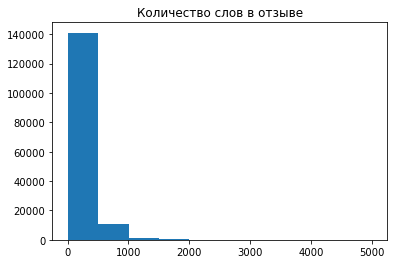

In [65]:
plt.hist(wcnt)
plt.title('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –≤ –æ—Ç–∑—ã–≤–µ')
plt.show()

In [67]:
lcnt.value_counts()
#–æ–±—Ä–∞–∑–æ–≤–∞–ª–∏—Å—å –∫–∞–∫–∏–µ —Ç–æ –≤—ã–±—Ä–æ—Å—ã –∏–∑ —Å–ª–æ–≤ –¥–ª–∏–Ω–Ω–æ–π 800+—Å–∏–º–æ–≤–æ–ª–æ–≤ (–≤–∏–¥–∏–º–æ, –æ—Ç–∑—ã–≤ –±—ã–ª –±–µ–∑ –ø—Ä–æ–±–µ–ª–æ–≤) 
#–Ω–µ –±—É–¥–µ–º —É—á–∏—Ç—ã–≤–∞—Ç—å –∏—Ö –≤ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–µ

1      4542201
5      4017825
2      3856558
6      3839532
3      3822022
        ...   
130          1
127          1
126          1
115          1
841          1
Length: 163, dtype: int64

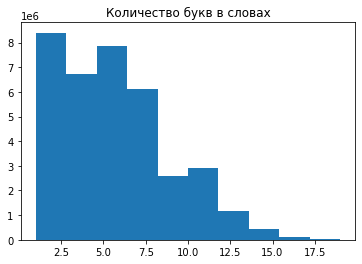

In [70]:
plt.hist(lcnt[lcnt[0]<20])
plt.title('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –±—É–∫–≤ –≤ —Å–ª–æ–≤–∞—Ö')
plt.show()

In [18]:
# 2. –ù–∞–π–¥–∏—Ç–µ 10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö:
# —Å–ª–æ–≤

words = pd.DataFrame(' '.join(texts).split())

In [19]:
vc = words.value_counts()
vc.head(10)

–≤      1157262
–∏       965735
–Ω–µ      808409
–Ω–∞      632541
—á—Ç–æ     586864
—è       427944
—Å       423586
–ø–æ      333342
-       294086
–º–Ω–µ     277035
dtype: int64

In [1]:
# —Å–ª–æ–≤ –±–µ–∑ —Å—Ç–æ–ø-—Å–ª–æ–≤
nltk.download('stopwords')
mystopwords = nltk.corpus.stopwords.words('russian') + ['–≥.']

NameError: name 'nltk' is not defined

In [28]:
datastopwords = list(set(mystopwords) & set(words[0]))

In [35]:
wordssw = pd.DataFrame(list(set(words[0]).difference(datastopwords)))

In [38]:
wordssw.value_counts()


üò≥                         1
–ó–ª–æ—Å—Ç–Ω—ã–º–Ω–µ–ø–ª–∞—Ç–µ–ª—å—â–∏–∫–æ–º    1
–ó–ª–æ—É–ø–æ—Ç—Ä–µ–±–∏–≤              1
–ó–ª–æ—É–º—ã—à–ª–µ–Ω–Ω–∏–∫—É            1
–ó–ª–æ—É–º—ã—à–ª–µ–Ω–Ω–∏–∫–æ–≤           1
                         ..
–Ω–∞–≤—è–∑—á–∏–≤–æ—Å—Ç—å...           1
–Ω–∞–≤—è–∑—á–∏–≤–æ—Å—Ç—å.             1
–Ω–∞–≤—è–∑—á–∏–≤–æ—Å—Ç—å,             1
–Ω–∞–≤—è–∑—á–∏–≤–æ—Å—Ç—å              1
!                         1
Length: 1111724, dtype: int64

In [2]:
# –ª–µ–º–º
# –ø–æ–ø—ã—Ç–∫–∏ —É—Å—Ç–∞–Ω–æ–≤–∏—Ç—å mystem –Ω–∏ –∫ —á–µ–º—É –Ω–µ –ø—Ä–∏–≤–µ–ª–∏, –≤—ã–Ω—É–∂–¥–µ–Ω –ø—Ä–æ–ø—É—Å—Ç–∏—Ç—å
from pymystem3 import Mystem
m = Mystem()
m.lemmatize('–Ω–∞–≤—è–∑–∞–Ω–æ,')

Installing mystem to C:\Users\roma/.local/bin\mystem.exe from http://download.cdn.yandex.net/mystem/mystem-3.1-win-64bit.zip


PermissionError: [WinError 32] –ü—Ä–æ—Ü–µ—Å—Å –Ω–µ –º–æ–∂–µ—Ç –ø–æ–ª—É—á–∏—Ç—å –¥–æ—Å—Ç—É–ø –∫ —Ñ–∞–π–ª—É, —Ç–∞–∫ –∫–∞–∫ —ç—Ç–æ—Ç —Ñ–∞–π–ª –∑–∞–Ω—è—Ç –¥—Ä—É–≥–∏–º –ø—Ä–æ—Ü–µ—Å—Å–æ–º: 'C:\\Users\\roma\\AppData\\Local\\Temp\\tmp198lw0zl'

## –ß–∞—Å—Ç—å 2. –¢–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ [20/100]

1. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏—Ö –º–æ–¥–µ–ª–µ–π –∫–æ–ª–ª–µ–∫—Ü–∏–∏ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ —Å —Ä–∞–∑–Ω—ã–º —á–∏—Å–ª–æ–º —Ç–µ–º. –ü—Ä–∏–≤–µ–¥–∏—Ç–µ –ø—Ä–∏–º–µ—Ä—ã –ø–æ–Ω—è—Ç–Ω—ã—Ö (–∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—ã—Ö) —Ç–µ–º.
2. –ù–∞–π–¥–∏—Ç–µ —Ç–µ–º—ã, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —É–ø–æ–º—è–Ω—É—Ç—ã –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–µ –±–∞–Ω–∫–∏ (–°–±–µ—Ä–±–∞–Ω–∫, –í–¢–ë, –¥—Ä—É–≥–æ–π –±–∞–Ω–∫). –ú–æ–∂–µ—Ç–µ –ª–∏ –≤—ã –∏—Ö –ø—Ä–æ–∫–æ–º–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å / –æ–±—ä—è—Å–Ω–∏—Ç—å?

–≠—Ç–∞ —á–∞—Å—Ç—å –∑–∞–¥–∞–Ω–∏—è –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–¥–µ–ª–∞–Ω–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º gensim. 

## –ß–∞—Å—Ç—å 3. –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤ [40/100]

–°—Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ–º –¥–ª—è –ø—Ä–æ—Å—Ç–æ—Ç—ã –∑–∞–¥–∞—á—É –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: –±—É–¥–µ–º –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –Ω–∞ –¥–≤–∞ –∫–ª–∞—Å—Å–∞, —Ç–æ –µ—Å—Ç—å, —Ä–∞–∑–ª–∏—á–∞—Ç—å —Ä–µ–∑–∫–æ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ –æ—Ç–∑—ã–≤—ã (—Å –æ—Ü–µ–Ω–∫–æ–π 1) –∏ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ –æ—Ç–∑—ã–≤—ã (—Å –æ—Ü–µ–Ω–∫–æ–π 5). 

1.  –°–æ—Å—Ç–∞–≤—å—Ç–µ –æ–±—É—á–∞—é—â–µ–µ –∏ —Ç–µ—Å—Ç–æ–≤–æ–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ: –≤—ã–±–µ—Ä–∏—Ç–µ –∏–∑ –≤—Å–µ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö N1 –æ—Ç–∑—ã–≤–æ–≤ —Å –æ—Ü–µ–Ω–∫–æ–π 1 –∏ N2 –æ—Ç–∑—ã–≤–æ–≤ —Å –æ—Ü–µ–Ω–∫–æ–π 5 (–∑–Ω–∞—á–µ–Ω–∏–µ N1 –∏ N2 ‚Äì –Ω–∞ –≤–∞—à–µ —É—Å–º–æ—Ç—Ä–µ–Ω–∏–µ). –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ ```sklearn.model_selection.train_test_split``` –¥–ª—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –º–Ω–æ–∂–µ—Å—Ç–≤–∞ –æ—Ç–æ–±—Ä–∞–Ω–Ω—ã—Ö –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –Ω–∞ –æ–±—É—á–∞—é—â–µ–µ –∏ —Ç–µ—Å—Ç–æ–≤–æ–µ. 
2. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –ª—é–±–æ–π –∏–∑–≤–µ—Å—Ç–Ω—ã–π –≤–∞–º –∞–ª–≥–æ—Ä–∏—Ç–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤ –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –∏ –ø–æ–ª—É—á–∏—Ç–µ baseline. –°—Ä–∞–≤–Ω–∏—Ç–µ —Ä–∞–∑–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–∞: –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Ç–æ–ª—å–∫–æ —É–Ω–∏–≥—Ä–∞–º, –ø–∞—Ä –∏–ª–∏ —Ç—Ä–æ–µ–∫ —Å–ª–æ–≤ –∏–ª–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Å–∏–º–≤–æ–ª—å–Ω—ã—Ö $n$-–≥—Ä–∞–º. 
3. –°—Ä–∞–≤–Ω–∏—Ç–µ, –∫–∞–∫ –∏–∑–º–µ–Ω—è–µ—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ —Å–∫—Ä—ã—Ç—ã—Ö —Ç–µ–º –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
* 1-—ã–π –≤–∞—Ä–∏–∞–Ω—Ç: $tf-idf$ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ (```sklearn.feature_extraction.text.TfidfTransformer```) –∏ —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–µ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏–µ (–æ–Ω–æ –∂–µ ‚Äì –ª–∞—Ç–µ–Ω—Ç—ã–π —Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑) (```sklearn.decomposition.TruncatedSVD```), 
* 2-–æ–π –≤–∞—Ä–∏–∞–Ω—Ç: —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–µ –º–æ–¥–µ–ª–∏ LDA (```sklearn.decomposition.LatentDirichletAllocation```). 

–ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ accuracy –∏ F-measure –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏. 

–ù–∏–∂–µ –Ω–∞–ø–∏—Å–∞–Ω –ø—Ä–∏–º–µ—Ä–Ω—ã–π Pipeline –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤. 

–≠—Ç–∞ —á–∞—Å—Ç—å –∑–∞–¥–∞–Ω–∏—è –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–¥–µ–ª–∞–Ω–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º sklearn. 

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# !!! –ù–∞ –∫–∞–∂–¥–æ–º —ç—Ç–∞–ø–µ Pipeline –Ω—É–∂–Ω–æ —É–∫–∞–∑–∞—Ç—å —Å–≤–æ–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
# 1-—ã–π –≤–∞—Ä–∏–∞–Ω—Ç: tf-idf + LSI
# 2-–æ–π –≤–∞—Ä–∏–∞–Ω—Ç: LDA

# clf = Pipeline([
#     ('vect', CountVectorizer(analyzer = 'char', ngram_range={4,6})),
#     ('clf', RandomForestClassifier()),
# ])



clf = Pipeline([ 
    ('vect', CountVectorizer()), 
    ('tfidf', TfidfTransformer()), 
    ('tm', TruncatedSVD()), 
    ('clf', RandomForestClassifier())
])


NameError: name 'CountVectorizer' is not defined